In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import seaborn as sns


In [47]:
df=pd.read_csv(r'.....\cell phone price\dataset\Cellphone.csv')
df


,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
157,1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
158,856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8
159,1296,3211,8946,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9


In [48]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [49]:
columns_to_drop=['Sale','weight','resoloution','thickness','Product_id']
df.drop(columns=columns_to_drop,axis=1,inplace=True)
df

,Price,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery
0,2357,424,8,1.350,16.0,3.000,13.00,8.0,2610
1,1749,233,2,1.300,4.0,1.000,3.15,0.0,1700
2,1916,312,4,1.200,8.0,1.500,13.00,5.0,2000
3,1315,233,2,1.300,4.0,0.512,3.15,0.0,1400
4,1749,233,2,1.300,4.0,1.000,3.15,0.0,1700
...,...,...,...,...,...,...,...,...,...
156,3551,538,4,1.875,128.0,6.000,12.00,16.0,4080
157,3211,534,4,1.975,128.0,6.000,20.00,8.0,3400
158,3260,401,8,2.200,64.0,4.000,20.00,20.0,3000
159,3211,534,4,1.975,128.0,6.000,20.00,8.0,3400


In [50]:

Price=df['Price']
df.drop(columns=['Price'],axis=1,inplace=True)
df['Price']=Price


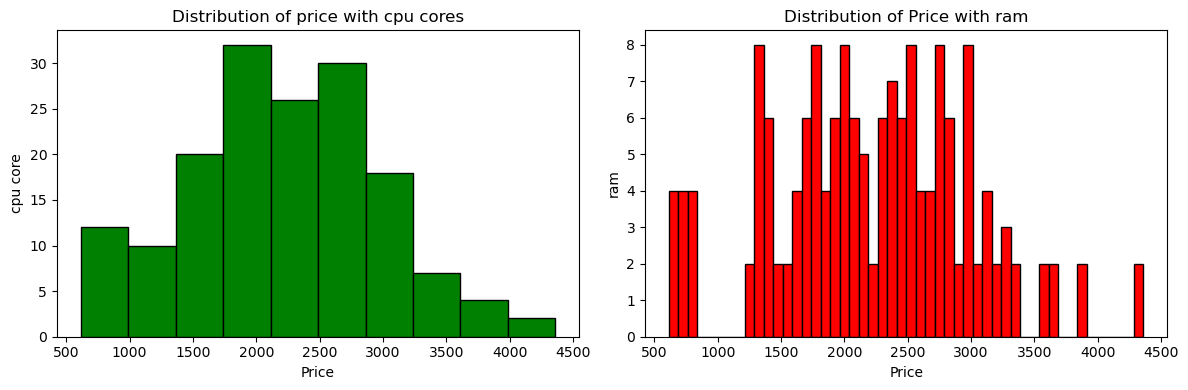

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# histogram for ratings 
axes[0].hist(df['Price'], bins=10, edgecolor='black', color='green')
axes[0].set_title('Distribution of price with cpu cores')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('cpu core')
# histogram for course prices
axes[1].hist(df['Price'], bins=50, edgecolor='black', color='red')
axes[1].set_title('Distribution of Price with ram')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('ram')
plt.tight_layout()
plt.show()

In [52]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q1 = df[column].quantile(0.25)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices
outlier_indices = outliers(df, 'Price')
outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices

,0
0,152
1,153


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
hf=RandomForestRegressor()
hf.fit(x_train,y_train)

RandomForestRegressor()

In [54]:
train_pred=hf.predict(x_train)
test_pred=hf.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE for training data:',mean_squared_error(y_train,train_pred))
print('MSE for testing data:',mean_squared_error(y_test,test_pred))

MSE for training data: 4218.310067105467
MSE for testing data: 16391.070605878784


In [55]:
x=df.drop(columns=['Price'])
y=df['Price']

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=hf.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'the mean squared error : {mse}')
print(f'the mean absolute error : {mae}')
print(f'the mean r2 error : {r2}')

the mean squared error : 16391.070605878784
the mean absolute error : 99.40936363636364
the mean r2 error : 0.9710859273513954


In [59]:
import joblib
joblib.dump(hf,"hf.pkl")



['hf.pkl']